# Introduction

For this project, i used the old accident report which has the severity level of the accident with the condition of how many people, cyclist or vehicles are involved the accident to build a machine learning model to predict the seveity level. The algorithm that i will be using will be the decision tree model.

The aim of the study is to see if the machine learning model can predict the severity level based on the number of person, cyclist, and vehicles that are involved in teh accident and if the drivers are speeding. The people might be interested in this project will be the doctors and nurses from emergency room, since emergency room doctors are always busy and its hard for them to determine how many people they need for the accident so if this machine learning model can have high accuracy to predict the severity level of the patients, it will be easier for the emergency room doctors and nurses to have enough resources for the patients before the ambulacne arrived to hospitals from accidents sites. 

# Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Load Data

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5d2e9b01e0f246a59b76a3c01d2d9e3e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9jbe1wQtQf2KCjQMEBtfLA3xK2UqaBUb4ojnDcAH-CwJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5d2e9b01e0f246a59b76a3c01d2d9e3e.get_object(Bucket='capstoneproject-donotdelete-pr-xqdt6k39ggim1r',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.info()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

# Prep Data

In [4]:
cdf = df[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND', 'SPEEDING', 'HITPARKEDCAR']]
cdf

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,SPEEDING,HITPARKEDCAR
0,2,2,0,0,2,NaN,NaN,N
1,1,2,0,0,2,NaN,NaN,N
2,1,4,0,0,3,NaN,NaN,N
3,1,3,0,0,3,NaN,NaN,N
4,2,2,0,0,2,NaN,NaN,N
5,1,2,0,0,2,NaN,NaN,N
6,1,2,0,0,2,NaN,NaN,N
7,2,3,0,1,1,NaN,NaN,N
8,1,2,0,0,2,NaN,NaN,N
9,2,2,0,0,2,NaN,NaN,N


In [5]:
cdf.isnull().sum()

SEVERITYCODE           0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INATTENTIONIND    164868
SPEEDING          185340
HITPARKEDCAR           0
dtype: int64

In [6]:
cdf['SPEEDING']=cdf['SPEEDING'].fillna('N')
cdf['INATTENTIONIND']=cdf['INATTENTIONIND'].fillna('N')
cdf.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


SEVERITYCODE       int64
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INATTENTIONIND    object
SPEEDING          object
HITPARKEDCAR      object
dtype: object

In [7]:
cdf.replace(('Y', 'N'), (1, 0), inplace = True)
cdf.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


SEVERITYCODE      int64
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
INATTENTIONIND    int64
SPEEDING          int64
HITPARKEDCAR      int64
dtype: object

# Visualization

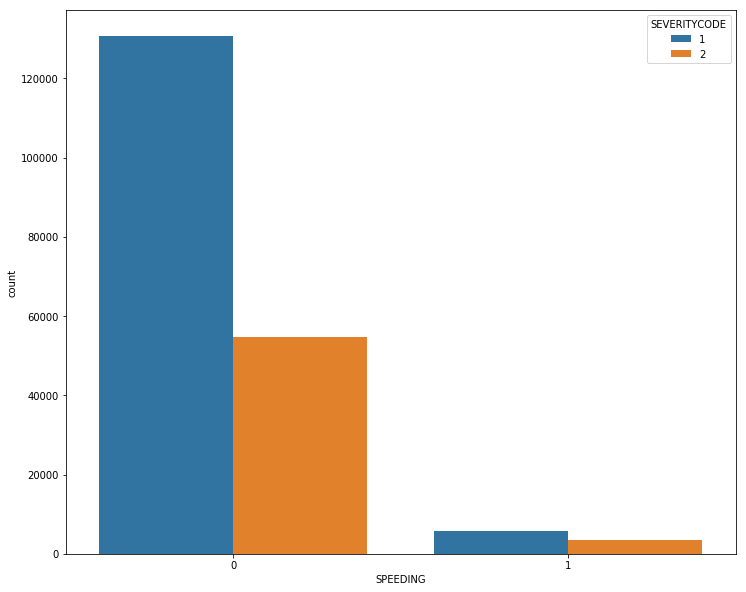

In [22]:
plt.figure(figsize=(12,10))
sns.countplot(x='SPEEDING', hue='SEVERITYCODE', data=cdf)

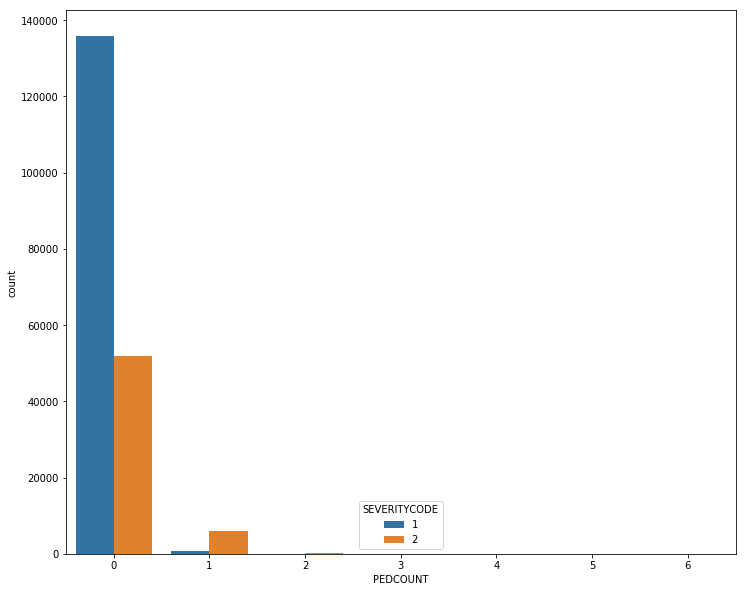

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(x='PEDCOUNT', hue='SEVERITYCODE', data=cdf)

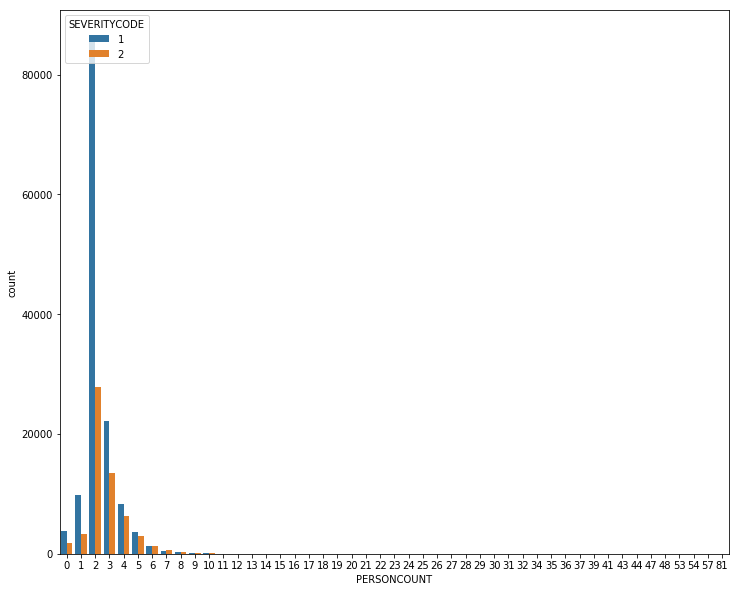

In [25]:
plt.figure(figsize=(12,10))
sns.countplot(x='PERSONCOUNT', hue='SEVERITYCODE', data=cdf)

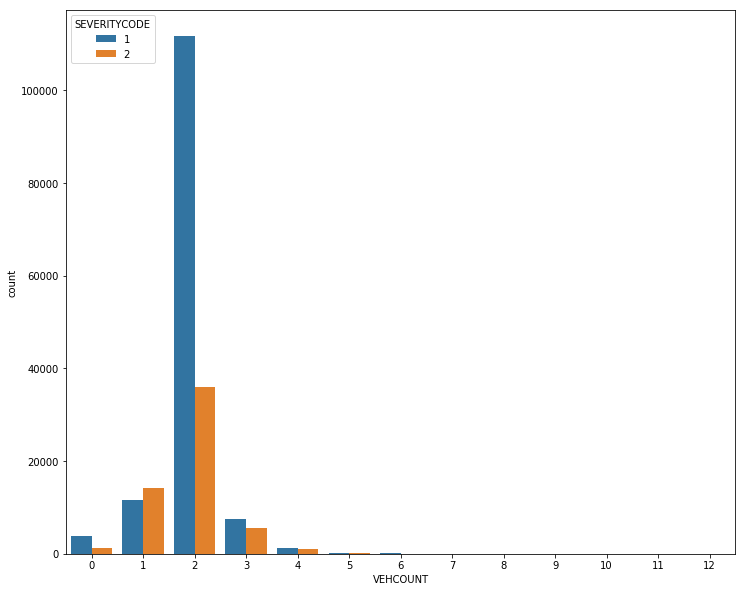

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(x='VEHCOUNT', hue='SEVERITYCODE', data=cdf)

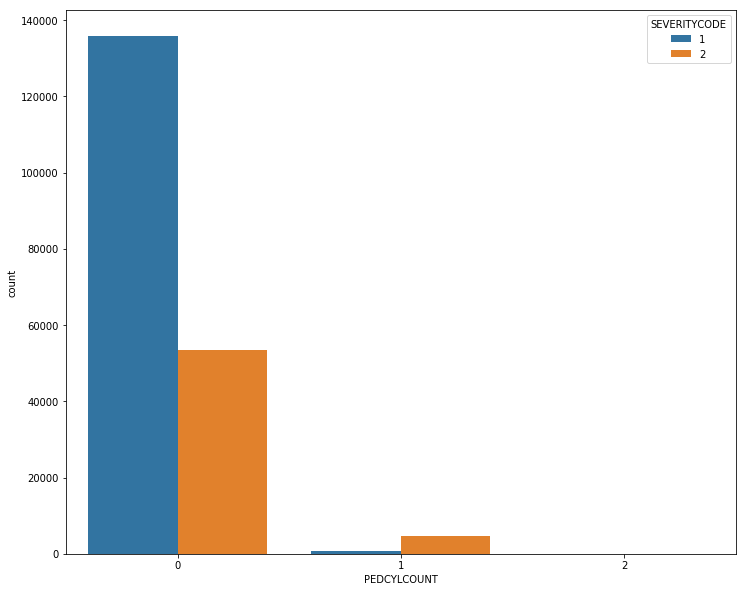

In [29]:
plt.figure(figsize=(12,10))
sns.countplot(x='PEDCYLCOUNT', hue='SEVERITYCODE', data=cdf)

In [8]:
features =cdf.drop(['SEVERITYCODE'], 1)
labels =cdf[['SEVERITYCODE']]
features_n = MinMaxScaler(feature_range = (0, 1)).fit(features).transform(features)  #Array
features=pd.DataFrame(features_n, columns=features.columns)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(labels),2))

0.8
0.2


In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
yhat= dt.predict(X_test)

In [19]:
f1_test = f1_score(y_test,yhat)
print("f1 score of the test dt model is",f1_test)

f1 score of the test dt model is 0.8494849963327913


In [18]:
f1_train= f1_score(y_train,dt.predict(X_train))
print("f1 score of the train dt model is",f1_train)

f1 score of the train dt model is 0.8476876333518809


# Result

In this study, Decision Tree model machine learning was used to predict the severity of the accident base on how many pedistrian, cyclist, vehicles, parked car are involved in the accidents. Results show that the f1 score for the train data is 0.849 and decreased to 0.847 for the test data. As the result, the model performed well to predict the severity of the accidents with high accuracy. In this case, the personnel at the hospitals emergency room can have a high accuracy of prediction on deciding how many personnel they need to help out the patients before the ambublance arrive to the hospital from the accidents site. 

# Conclusion

The aim of this project is to use machine learning to solve real world problems. In this case, decision tree algroithm was used to predict the accident severity level. Other than that, it help the student to get hands on experience on various phase such as business understanding, data understanding, data preperation, modeling, evaluation, and deployment.